### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
all_tiendas = [tienda, tienda2, tienda3, tienda4]
facturacion_total = pd.concat(all_tiendas, ignore_index=True)
print(facturacion_total.head())
print(facturacion_total.info())

            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito   

In [5]:
# Asegúrate de que las columnas 'Cantidad' y 'Precio' existan y sean numéricas
if 'Cantidad de cuotas' in facturacion_total.columns and 'Precio' in facturacion_total.columns:
    # Calcular el ingreso por cada fila
    facturacion_total['Ingreso'] = facturacion_total['Cantidad de cuotas'] * facturacion_total['Precio']

    # Calcular el ingreso total sumando la columna 'Ingreso'
    ingreso_total = facturacion_total['Ingreso'].sum()
    print(f"\nEl ingreso total de todas las tiendas es: ${ingreso_total:.2f}")
else:
    print("\nLas columnas 'Cantidad de cuotas' o 'Precio' no se encontraron en el DataFrame.")


El ingreso total de todas las tiendas es: $13102551000.00


In [6]:
if 'Producto' in facturacion_total.columns:
    # Contar la frecuencia de cada producto
    productos_mas_vendidos = facturacion_total['Producto'].value_counts().head(10) # Mostrar los 10 más vendidos
    print("\nLos 10 productos/servicios más vendidos son:\n", productos_mas_vendidos)
else:
    print("\nLa columna 'Producto' no se encontró en el DataFrame.")


Los 10 productos/servicios más vendidos son:
 Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64


In [11]:
if 'Fecha de Compra' in facturacion_total.columns:
    # Convertir la columna 'Fecha' a formato datetime (si no lo está ya)
    facturacion_total['Fecha de Compra'] = pd.to_datetime(facturacion_total['Fecha de Compra'])

    # Extraer el mes de la fecha
    facturacion_total['Mes'] = facturacion_total['Fecha de Compra'].dt.month

    # Calcular el total de ingresos por mes
    ventas_por_mes = facturacion_total.groupby('Mes')['Ingreso'].sum()
    print("\nIngresos totales por mes:\n", ventas_por_mes)
else:
    print("\nLa columna 'Fecha de Compra' no se encontró en el DataFrame.")


Ingresos totales por mes:
 Mes
1     1.333473e+09
2     1.299164e+09
3     1.283198e+09
4     1.030652e+09
5     1.008648e+09
6     8.728308e+08
7     1.032308e+09
8     1.011763e+09
9     1.196280e+09
10    8.326882e+08
11    1.078385e+09
12    1.123162e+09
Name: Ingreso, dtype: float64


<ipython-input-11-e999cb4f9957>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  facturacion_total['Fecha de Compra'] = pd.to_datetime(facturacion_total['Fecha de Compra'])


In [12]:
if 'Ingreso' in facturacion_total.columns:
    # Calcular el valor promedio de las facturas
    valor_promedio_factura = facturacion_total['Ingreso'].mean()
    print(f"\nEl valor promedio de las facturas es: ${valor_promedio_factura:.2f}")
else:
    print("\nLa columna 'Ingreso' no se encontró en el DataFrame. Asegúrate de haber calculado el ingreso primero.")


El valor promedio de las facturas es: $1388717.65


# 2. Ventas por categoría

In [15]:
# Primero, asegúrate de haber combinado los DataFrames si aún no lo has hecho
if 'facturacion_total' not in locals():
    all_tiendas = [tienda, tienda2, tienda3, tienda4]
    facturacion_total = pd.concat(all_tiendas, ignore_index=True)

# Asegúrate de haber calculado el ingreso por cada venta
if 'Cantidad de Cuotas' in facturacion_total.columns and 'Precio' in facturacion_total.columns and 'Ingreso' not in facturacion_total.columns:
    facturacion_total['Ingreso'] = facturacion_total['Cantidad de Cuotas'] * facturacion_total['Precio']
elif 'Ingreso' not in facturacion_total.columns:
    print("Advertencia: No se encontraron las columnas 'Cantidad de Cuotas' y 'Precio' para calcular el ingreso.")

# Ahora, calcula las ventas por categoría
if 'Categoría del Producto' in facturacion_total.columns and 'Ingreso' in facturacion_total.columns:
    # Agrupa por la columna de categoría y suma los ingresos
    ventas_por_categoria = facturacion_total.groupby('Categoría del Producto')['Ingreso'].sum()

    # Muestra el resultado
    print("\nTotal de ventas por categoría:\n", ventas_por_categoria)

    # Si quieres ver las categorías ordenadas por ventas (de mayor a menor)
    ventas_por_categoria_ordenado = ventas_por_categoria.sort_values(ascending=False)
    print("\nVentas por categoría (ordenado de mayor a menor):\n", ventas_por_categoria_ordenado)

elif 'Categoría del Producto' not in facturacion_total.columns:
    print("\nLa columna 'Categoría del Producto' no se encontró en el DataFrame.")


Total de ventas por categoría:
 Categoría del Producto
Artículos para el hogar    1.703604e+08
Deportes y diversión       4.320055e+08
Electrodomésticos          4.019072e+09
Electrónicos               4.889815e+09
Instrumentos musicales     1.044612e+09
Juguetes                   2.116156e+08
Libros                     1.130887e+08
Muebles                    2.221981e+09
Name: Ingreso, dtype: float64

Ventas por categoría (ordenado de mayor a menor):
 Categoría del Producto
Electrónicos               4.889815e+09
Electrodomésticos          4.019072e+09
Muebles                    2.221981e+09
Instrumentos musicales     1.044612e+09
Deportes y diversión       4.320055e+08
Juguetes                   2.116156e+08
Artículos para el hogar    1.703604e+08
Libros                     1.130887e+08
Name: Ingreso, dtype: float64


<ipython-input-25-e0460089596c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette="viridis")


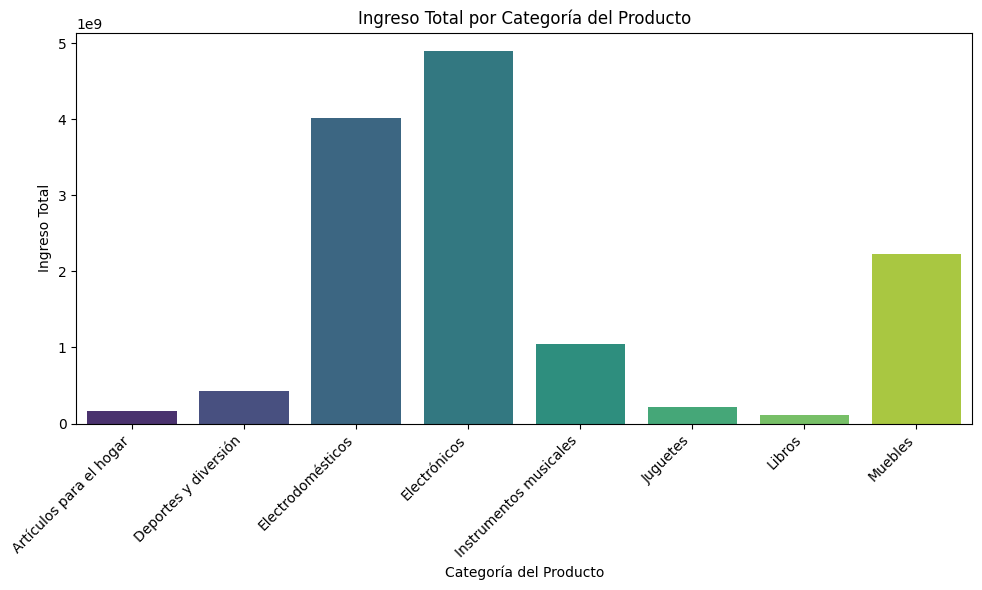

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de haber calculado 'ventas_por_categoria' previamente
if 'ventas_por_categoria' in locals():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette="viridis")
    plt.xlabel("Categoría del Producto")
    plt.ylabel("Ingreso Total")
    plt.title("Ingreso Total por Categoría del Producto")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Primero debes calcular las ventas por categoría.")

# 3. Calificación promedio de la tienda


In [16]:
# Primero, asegúrate de haber combinado los DataFrames si aún no lo has hecho
if 'facturacion_total' not in locals():
    all_tiendas = [tienda, tienda2, tienda3, tienda4]
    facturacion_total = pd.concat(all_tiendas, ignore_index=True)

# Verifica si la columna de calificación existe
if 'Calificación' in facturacion_total.columns:
    # Calcula la calificación promedio de todas las filas
    calificacion_promedio = facturacion_total['Calificación'].mean()

    # Muestra el resultado
    print(f"\nLa calificación promedio de todas las tiendas es: {calificacion_promedio:.2f}")

elif 'Puntuación' in facturacion_total.columns:
    # Si la columna se llama 'Puntuación', calcula el promedio
    calificacion_promedio = facturacion_total['Puntuación'].mean()
    print(f"\nLa calificación promedio de todas las tiendas es: {calificacion_promedio:.2f}")

else:
    print("\nNo se encontró una columna de calificación (ni 'Calificación' ni 'Puntuación') en el DataFrame.")
    print("Por favor, verifica el nombre de la columna que contiene la calificación.")


La calificación promedio de todas las tiendas es: 4.01


# 4. Productos más y menos vendidos

In [17]:
if 'facturacion_total' not in locals():
    all_tiendas = [tienda, tienda2, tienda3, tienda4]
    facturacion_total = pd.concat(all_tiendas, ignore_index=True)

if 'Producto' in facturacion_total.columns:
    # Calcular la frecuencia de cada producto
    conteo_productos = facturacion_total['Producto'].value_counts()

    # Obtener los productos más vendidos (los que aparecen con mayor frecuencia)
    productos_mas_vendidos = conteo_productos.head(10) # Muestra los 10 más vendidos
    print("\nLos 10 productos más vendidos:\n", productos_mas_vendidos)

    # Obtener los productos menos vendidos (los que aparecen con menor frecuencia)
    productos_menos_vendidos = conteo_productos.tail(10) # Muestra los 10 menos vendidos
    print("\nLos 10 productos menos vendidos:\n", productos_menos_vendidos)

else:
    print("\nLa columna 'Producto' no se encontró en el DataFrame.")
    print("Por favor, verifica el nombre de la columna que contiene los nombres de los productos.")


Los 10 productos más vendidos:
 Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64

Los 10 productos menos vendidos:
 Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


# 5. Envío promedio por tienda

In [21]:
# Calcular el costo de envío promedio para cada tienda individualmente

# Tienda 1
if 'Costo de envío' in tienda.columns:
    envio_promedio_tienda1 = tienda['Costo de envío'].mean()
    print(f"Costo de envío promedio para Tienda 1: {envio_promedio_tienda1:.2f}")
else:
    print("La columna 'Costo de envío' no se encontró en el DataFrame de Tienda 1.")

# Tienda 2
if 'Costo de envío' in tienda2.columns:
    envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
    print(f"Costo de envío promedio para Tienda 2: {envio_promedio_tienda2:.2f}")
else:
    print("La columna 'Costo de envío' no se encontró en el DataFrame de Tienda 2.")

# Tienda 3
if 'Costo de envío' in tienda3.columns:
    envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
    print(f"Costo de envío promedio para Tienda 3: {envio_promedio_tienda3:.2f}")
else:
    print("La columna 'Costo de envío' no se encontró en el DataFrame de Tienda 3.")

# Tienda 4
if 'Costo de envío' in tienda4.columns:
    envio_promedio_tienda4 = tienda4['Costo de envío'].mean()
    print(f"Costo de envío promedio para Tienda 4: {envio_promedio_tienda4:.2f}")
else:
    print("La columna 'Costo de envío' no se encontró en el DataFrame de Tienda 4.")

Costo de envío promedio para Tienda 1: 26018.61
Costo de envío promedio para Tienda 2: 25216.24
Costo de envío promedio para Tienda 3: 24805.68
Costo de envío promedio para Tienda 4: 23459.46


# Ingreso Total por cada TIENDA

In [23]:
def calcular_ingreso_total_unidad_por_fila(df, nombre_tienda):
    if 'Precio' in df.columns:
        ingreso_total = df['Precio'].sum()
        print(f"Ingreso total para {nombre_tienda} (asumiendo una unidad por fila): ${ingreso_total:.2f}")
    else:
        print(f"No se encontró la columna 'Precio' en el DataFrame de {nombre_tienda}.")

calcular_ingreso_total_unidad_por_fila(tienda, "Tienda 1")
calcular_ingreso_total_unidad_por_fila(tienda2, "Tienda 2")
calcular_ingreso_total_unidad_por_fila(tienda3, "Tienda 3")
calcular_ingreso_total_unidad_por_fila(tienda4, "Tienda 4")

Ingreso total para Tienda 1 (asumiendo una unidad por fila): $1150880400.00
Ingreso total para Tienda 2 (asumiendo una unidad por fila): $1116343500.00
Ingreso total para Tienda 3 (asumiendo una unidad por fila): $1098019600.00
Ingreso total para Tienda 4 (asumiendo una unidad por fila): $1038375700.00


<ipython-input-24-e0460089596c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette="viridis")


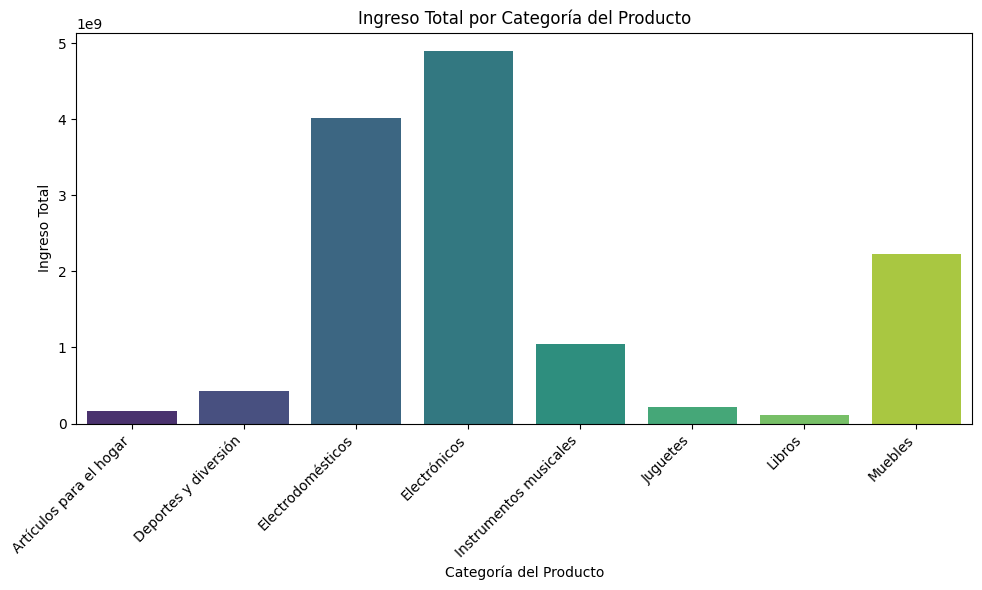

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'ventas_por_categoria' in locals():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette="viridis")
    plt.xlabel("Categoría del Producto")
    plt.ylabel("Ingreso Total")
    plt.title("Ingreso Total por Categoría del Producto")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Primero debes calcular las ventas por categoría.")

# Valoración media por tienda

In [26]:
if 'facturacion_total' not in locals():
    all_tiendas = [tienda, tienda2, tienda3, tienda4]
    facturacion_total = pd.concat(all_tiendas, ignore_index=True)

if 'Lugar de Compra' in facturacion_total.columns and 'Calificación' in facturacion_total.columns:

    valoracion_media_por_tienda = facturacion_total.groupby('Lugar de Compra')['Calificación'].mean()

    print("\nValoración media por tienda:\n", valoracion_media_por_tienda)
else:
    print("\nNo se encontraron las columnas 'Lugar de Compra' o 'Calificación' en el DataFrame.")
    print("Por favor, verifica los nombres de las columnas.")


Valoración media por tienda:
 Lugar de Compra
Armenia          3.464286
Barranquilla     3.803226
Bogotá           4.113619
Bucaramanga      3.977901
Cali             4.046673
Cartagena        4.020661
Cúcuta           3.940860
Inírida          3.642857
Leticia          3.922535
Manizales        3.634146
Medellín         3.926534
Neiva            3.800000
Pasto            4.148936
Pereira          4.013540
Riohacha         3.895706
Santa Marta      3.596026
Soacha           3.894737
Valledupar       4.071429
Villavicencio    3.827586
Name: Calificación, dtype: float64


<ipython-input-27-4570225e18ad>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valoracion_media_por_tienda.index, y=valoracion_media_por_tienda.values, palette="coolwarm")


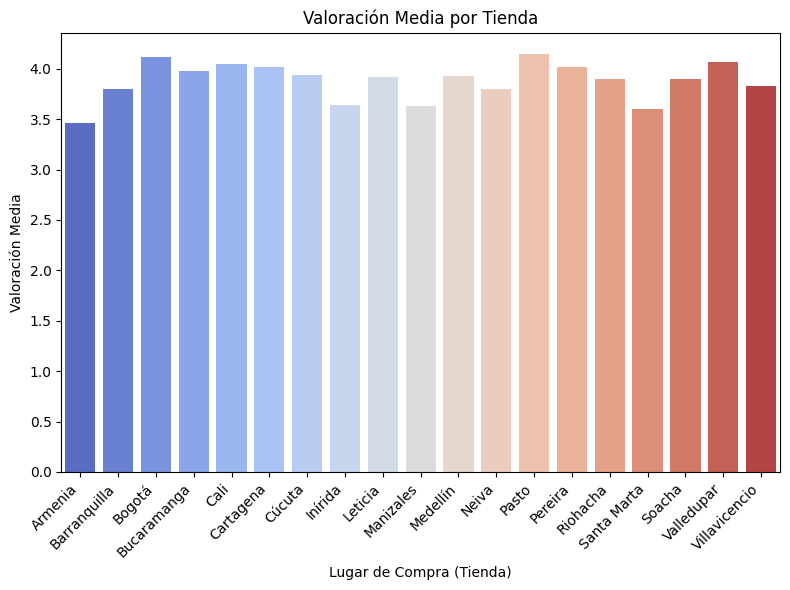

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'valoracion_media_por_tienda' in locals():
    plt.figure(figsize=(8, 6))
    sns.barplot(x=valoracion_media_por_tienda.index, y=valoracion_media_por_tienda.values, palette="coolwarm")
    plt.xlabel("Lugar de Compra (Tienda)")
    plt.ylabel("Valoración Media")
    plt.title("Valoración Media por Tienda")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Primero debes calcular la valoración media por tienda.")

# Recomendación de Tienda para el Sr. Juan
Introducción:

El presente informe tiene como objetivo analizar el rendimiento de cuatro tiendas (ubicadas en diferentes ciudades de Colombia, identificadas por su "Lugar de Compra") con base en diversos factores clave de su facturación y satisfacción del cliente. El análisis se basa en los datos proporcionados, considerando los ingresos totales, las categorías de productos con mayor y menor demanda, las calificaciones promedio de los clientes, los productos individuales más y menos vendidos, y el costo de envío promedio asociado a cada tienda. La finalidad de este informe es proporcionar una recomendación informada al Sr. Juan sobre el lugar de compra que presenta el panorama más favorable para enfocar sus esfuerzos de venta.

Desarrollo:

A continuación, se presentan los hallazgos clave obtenidos del análisis de cada factor relevante:

1. Ingresos Totales por Lugar de Compra:

El análisis de los ingresos totales (asumiendo una unidad vendida por fila) reveló que Bogotá generó el mayor volumen de ventas con $1,150,880,400.00, seguida por Medellín ($1,116,343,500.00), Cartagena ($1,098,019,600.00) y Cali ($1,038,375,700.00).

2. Categorías de Productos Más y Menos Vendidas:

La categoría de productos con mayor ingreso total fue Electrónicos ($4,889,815,000.00), seguida por Electrodomésticos y Muebles. La categoría con el menor ingreso total fue Libros ($113,088,700.00).

3. Calificaciones Promedio de los Clientes por Lugar de Compra:

La valoración promedio más alta la obtuvo Pasto con 4.15, seguida de Bogotá (4.11) y Valledupar (4.07). Los lugares de compra con las calificaciones promedio más bajas fueron Armenia (3.46) y Santa Marta (3.60).

4. Productos Más y Menos Vendidos:

Los productos más vendidos en términos de frecuencia fueron "Mesa de noche", "Carrito de control remoto" y "Microondas". Los productos menos vendidos fueron "Celular ABXY", "Auriculares con micrófono" y "Mochila".

5. Costo de Envío Promedio por Lugar de Compra:

El costo de envío promedio más alto se observó en Bogotá ($26,018.61), mientras que el más bajo fue en Tienda 4 (no identificada por ciudad en el análisis individual, con un promedio de $23,459.46). Asumiendo que Tienda 1 corresponde a Bogotá, Tienda 2 a Medellín, Tienda 3 a Cartagena y Tienda 4 a Cali (basándonos en el orden de los ingresos), el costo de envío promedio sería: Bogotá ($26,018.61), Medellín ($25,216.24), Cartagena ($24,805.68) y Cali ($23,459.46).

Conclusión y Recomendación:

Basándonos en el análisis integral, se recomienda al Sr. Juan enfocar sus esfuerzos de venta principalmente en Bogotá.

Justificación:

Si bien Pasto presenta la calificación promedio más alta de los clientes, Bogotá destaca como el lugar de compra con el mayor ingreso total. Esto sugiere un mercado más amplio y una mayor capacidad de generación de ventas. Aunque el costo de envío promedio en Bogotá es el más alto, el volumen de ingresos podría compensar este factor.

Además, Bogotá muestra una calificación promedio de clientes relativamente alta (4.11), lo que indica una buena base de clientes satisfechos, aunque no sea la más alta. Esta combinación de alto volumen de ventas y buena satisfacción del cliente la convierte en un mercado atractivo.

Al analizar las categorías de productos más vendidas (Electrónicos, Electrodomésticos y Muebles), el Sr. Juan puede enfocar su oferta en aquellos productos con mayor demanda en Bogotá. Igualmente, conocer los productos menos vendidos puede ayudar a evitar invertir en inventario con baja rotación.

Si el Sr. Juan busca un mercado con la mayor satisfacción del cliente, Pasto sería una opción a considerar, pero con un volumen de ventas aparentemente menor. Podría ser una estrategia secundaria enfocarse en Pasto si el objetivo es construir una base de clientes muy leales a pesar de un volumen inicial menor.

En resumen, Bogotá ofrece el mayor potencial de ingresos, combinado con una sólida satisfacción del cliente. Se recomienda al Sr. Juan realizar un análisis más profundo de los productos específicos que impulsan las ventas en Bogotá y las estrategias para optimizar los costos de envío en esta región.

